In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import fanc
import fanc.plotting
from scipy import ndimage as ndi
import matplotlib.patches as patches
from scipy.ndimage import zoom
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#plt.rcParams['text.usetex'] = True
# plt.style.use(['dark_background'])
# plt.style.use('classic')
%matplotlib inline
prop_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Examine chess sim results for Az-Oruf comparison
# CHESS OLD implementation
1kb resolution had no SN>0.5 values
# 2kb resolution

In [35]:
wdir = "./"
chess_results_file = "az_oruf_chess_results_2kb_OLD.tsv"
region_pairs = "az_oruf_SBs.bedpe"

similarities = pd.read_csv(wdir + chess_results_file, sep='\t')
similarities.index = range(1, len(similarities) + 1)  # Set row index starting from 1
# Read the region_pairs file with the 1-based modification
regions = pd.read_csv(wdir + region_pairs, sep='\t', header=None)
regions.index = range(1, len(regions) + 1)  # Set row index starting from 1

In [36]:
print(regions.head(20))

        0         1         2      3         4         5   6  7  8  9
1   chr12   3160860   3216128  chr12   3126149   3181446   1  .  +  +
2   chr12   3444055   3514482  chr12   3390107   3457923   2  .  +  +
3   chr12   4104612   4165893  chr12   4013038   4069262   3  .  +  +
4   chr12   4387023   4482117  chr12   4132212   4228970   4  .  +  +
5   chr12   6628260   6690481  chr12   6041248   6103662   5  .  +  +
6   chr12  12145218  12210249  chr12  10411677  10477708   6  .  +  +
7   chr12  18544492  18603493  chr12  15151230  15209634   7  .  +  +
8   chr12  18693728  18768700  chr12  15276994  15351961   8  .  +  +
9   chr12  21093056  21157806  chr12  17803705  17859627   9  .  +  +
10  chr12  22392481  22453009  chr12  18996233  19056605  10  .  +  +
11  chr12  23008833  23071008  chr12  19531373  19593287  11  .  +  +
12  chr12  23446356  23501247  chr12  19941589  19992318  12  .  +  +
13  chr12  23732309  23783367  chr12  20127694  20178775  13  .  +  +
14  chr12  24005157 

In [37]:
print(similarities.head(20))

    ID        SN      ssim    z_ssim      z_bg      p_bg
1    1       NaN       NaN       NaN       NaN       NaN
2    2       NaN       NaN       NaN       NaN       NaN
3    3       NaN       NaN       NaN       NaN       NaN
4    4       NaN       NaN       NaN       NaN       NaN
5    5       NaN       NaN       NaN       NaN       NaN
6    6       NaN       NaN       NaN       NaN       NaN
7    7       NaN       NaN       NaN       NaN       NaN
8    8       NaN       NaN       NaN       NaN       NaN
9    9       NaN       NaN       NaN       NaN       NaN
10  10       NaN       NaN       NaN       NaN       NaN
11  11       NaN       NaN       NaN       NaN       NaN
12  12       NaN       NaN       NaN       NaN       NaN
13  13       NaN       NaN       NaN       NaN       NaN
14  14       NaN       NaN       NaN       NaN       NaN
15  15       NaN       NaN       NaN       NaN       NaN
16  16       NaN       NaN       NaN       NaN       NaN
17  17  0.348304  0.102693 -0.8

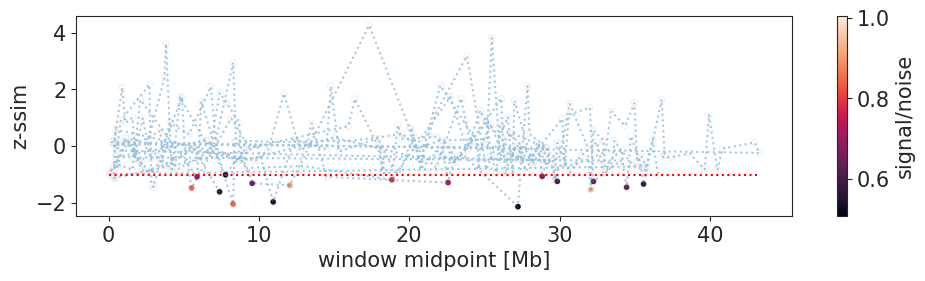

In [38]:
sim_field = "z_ssim"
sn_thr = 0.5
zsim_thr = -1
sub_sim = similarities[(similarities["SN"]>= sn_thr) & (similarities[sim_field]<= zsim_thr)]

all_X = regions.loc[similarities.index, 1:2].mean(axis=1).values / 10 ** 6
X = regions.loc[sub_sim.index, 1:2].mean(axis=1).values / 10 ** 6
S = sub_sim[sim_field]
SN = sub_sim["SN"]
plt.figure(figsize=(10, 3))
plt.plot(all_X, similarities[sim_field], ":", alpha=0.4)
plt.hlines(zsim_thr, 0, max(all_X), linestyle=":", color="red")
plt.scatter(all_X, similarities[sim_field], facecolors='none', edgecolors='grey', alpha=0.1, s=20)
plt.scatter(X, S, c=SN, marker='.')
plt.ylabel(sim_field.replace("_", "-"))
plt.xlabel("window midpoint [Mb]")
c = plt.colorbar()
c.set_label("signal/noise")
plt.tight_layout()
#plt.savefig("../../docs/plots/chr2_{}_results_track.png".format(winsize), dpi=250)

In [39]:
similarities[(similarities["SN"]>= sn_thr)].sort_values("z_ssim")

,ID,SN,ssim,z_ssim,z_bg,p_bg
38,43,0.509267,-0.037453,-2.130414,-1.328587,0.907052
23,23,0.839160,-0.026999,-2.037726,-1.280565,0.902577
87,94,0.544385,-0.018526,-1.962605,-0.662913,0.740347
160,169,0.565053,0.021579,-1.607016,0.065352,0.438335
47,52,0.934506,0.030801,-1.525255,0.178102,0.414095
...,...,...,...,...,...,...
184,193,0.616741,0.535025,2.945371,5.173625,0.000024
166,175,1.084205,0.561131,3.176841,3.675426,0.000824
287,306,0.684863,0.610130,3.611278,5.243026,0.000009
226,239,0.512872,0.632309,3.807930,5.258147,0.000024


In [51]:
similarities[(similarities["SN"]>= sn_thr)].sort_values("z_ssim").head(10)

,ID,SN,ssim,z_ssim,z_bg,p_bg
38,43,0.509267,-0.037453,-2.130414,-1.328587,0.907052
23,23,0.839160,-0.026999,-2.037726,-1.280565,0.902577
87,94,0.544385,-0.018526,-1.962605,-0.662913,0.740347
160,169,0.565053,0.021579,-1.607016,0.065352,0.438335
47,52,0.934506,0.030801,-1.525255,0.178102,0.414095
123,131,0.854815,0.036558,-1.474211,0.259434,0.366865
53,58,0.646477,0.039702,-1.446330,0.308872,0.361950
219,230,0.901391,0.047511,-1.377093,0.302277,0.321859
56,61,0.588563,0.052451,-1.333296,0.328472,0.295084
218,227,0.653170,0.055277,-1.308235,0.038834,0.434387


In [43]:
#plotting example regions
patient_hic = fanc.load(wdir + "../oruf_mrg/ruf_mrg.mcool@2000")
control_hic = fanc.load(wdir + "../az_new/az_new.mcool@2000")

# Five most dissimilar regions

chr03:27206362-27257535


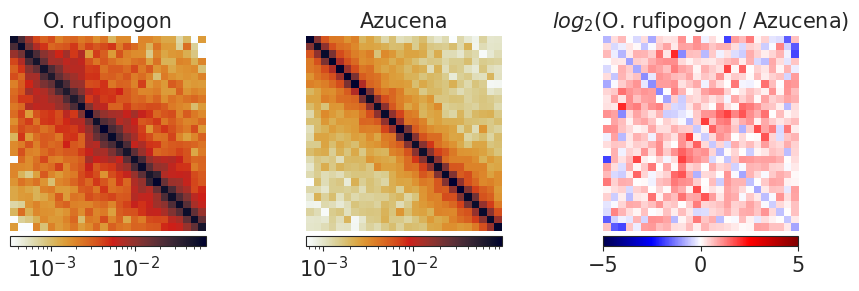

In [46]:
region_id = 38

window_start, window_end = regions.loc[region_id][1:3]
chromosome = regions.loc[region_id][0]

region_string = "{}:{}-{}".format(chromosome, window_start, window_end)
print(region_string)

patient_region_sub = patient_hic[region_string, region_string].data
control_region_sub = control_hic[region_string, region_string].data

min_v = min(
    [
        np.min(np.extract(patient_region_sub>0 , patient_region_sub)),
        np.min(np.extract(control_region_sub>0 , control_region_sub))
    ]
)

patient_region_sub += min_v
control_region_sub += min_v

l2fcm = np.log2(patient_region_sub / control_region_sub)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].set_title('O. rufipogon')
axes[1].set_title('Azucena')
axes[2].set_title('$log_2$(O. rufipogon / Azucena)')

m1 = axes[0].imshow(patient_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m2 = axes[1].imshow(control_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m3 = axes[2].imshow(l2fcm, cmap='seismic', vmax=5, vmin=-5)
for m, ax in zip([m1, m2, m3], axes):
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(m, cax=cax, orientation='horizontal')

plt.tight_layout()
#plt.savefig("../../docs/plots/chr2_example_region.png", dpi=250)

chr03:8248070-8307369


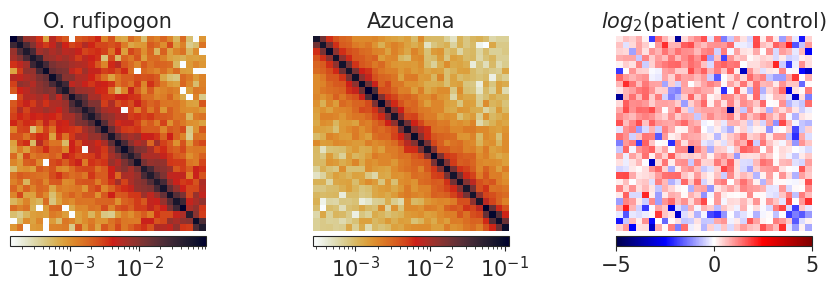

In [47]:
region_id = 23

window_start, window_end = regions.loc[region_id][1:3]
chromosome = regions.loc[region_id][0]

region_string = "{}:{}-{}".format(chromosome, window_start, window_end)
print(region_string)

patient_region_sub = patient_hic[region_string, region_string].data
control_region_sub = control_hic[region_string, region_string].data

min_v = min(
    [
        np.min(np.extract(patient_region_sub>0 , patient_region_sub)),
        np.min(np.extract(control_region_sub>0 , control_region_sub))
    ]
)

patient_region_sub += min_v
control_region_sub += min_v

l2fcm = np.log2(patient_region_sub / control_region_sub)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].set_title('O. rufipogon')
axes[1].set_title('Azucena')
axes[2].set_title('$log_2$(patient / control)')

m1 = axes[0].imshow(patient_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m2 = axes[1].imshow(control_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m3 = axes[2].imshow(l2fcm, cmap='seismic', vmax=5, vmin=-5)
for m, ax in zip([m1, m2, m3], axes):
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(m, cax=cax, orientation='horizontal')

plt.tight_layout()
#plt.savefig("../../docs/plots/chr2_example_region.png", dpi=250)

chr09:10917850-10980129


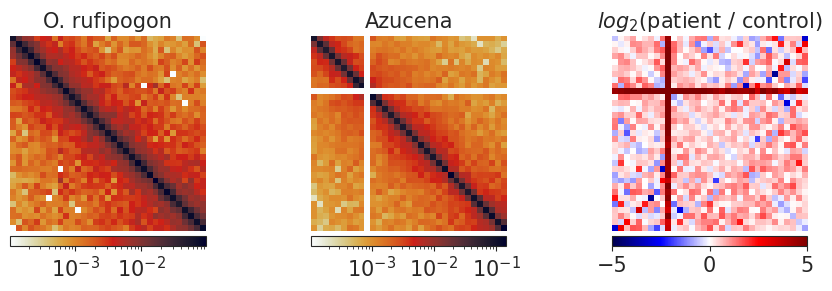

In [48]:
region_id = 87

window_start, window_end = regions.loc[region_id][1:3]
chromosome = regions.loc[region_id][0]

region_string = "{}:{}-{}".format(chromosome, window_start, window_end)
print(region_string)

patient_region_sub = patient_hic[region_string, region_string].data
control_region_sub = control_hic[region_string, region_string].data

min_v = min(
    [
        np.min(np.extract(patient_region_sub>0 , patient_region_sub)),
        np.min(np.extract(control_region_sub>0 , control_region_sub))
    ]
)

patient_region_sub += min_v
control_region_sub += min_v

l2fcm = np.log2(patient_region_sub / control_region_sub)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].set_title('O. rufipogon')
axes[1].set_title('Azucena')
axes[2].set_title('$log_2$(patient / control)')

m1 = axes[0].imshow(patient_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m2 = axes[1].imshow(control_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m3 = axes[2].imshow(l2fcm, cmap='seismic', vmax=5, vmin=-5)
for m, ax in zip([m1, m2, m3], axes):
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(m, cax=cax, orientation='horizontal')

plt.tight_layout()
#plt.savefig("../../docs/plots/chr2_example_region.png", dpi=250)

chr06:7343414-7422822


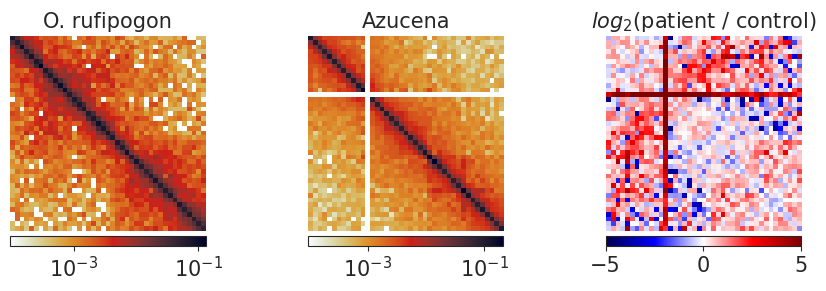

In [49]:
region_id = 160

window_start, window_end = regions.loc[region_id][1:3]
chromosome = regions.loc[region_id][0]

region_string = "{}:{}-{}".format(chromosome, window_start, window_end)
print(region_string)

patient_region_sub = patient_hic[region_string, region_string].data
control_region_sub = control_hic[region_string, region_string].data

min_v = min(
    [
        np.min(np.extract(patient_region_sub>0 , patient_region_sub)),
        np.min(np.extract(control_region_sub>0 , control_region_sub))
    ]
)

patient_region_sub += min_v
control_region_sub += min_v

l2fcm = np.log2(patient_region_sub / control_region_sub)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].set_title('O. rufipogon')
axes[1].set_title('Azucena')
axes[2].set_title('$log_2$(patient / control)')

m1 = axes[0].imshow(patient_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m2 = axes[1].imshow(control_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m3 = axes[2].imshow(l2fcm, cmap='seismic', vmax=5, vmin=-5)
for m, ax in zip([m1, m2, m3], axes):
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(m, cax=cax, orientation='horizontal')

plt.tight_layout()
#plt.savefig("../../docs/plots/chr2_example_region.png", dpi=250)

chr03:32048507-32110093


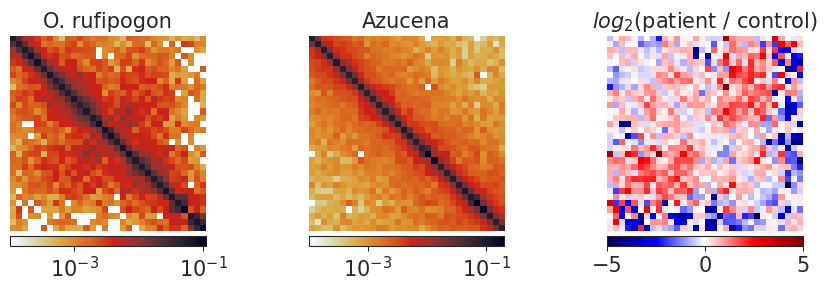

In [50]:
region_id = 47

window_start, window_end = regions.loc[region_id][1:3]
chromosome = regions.loc[region_id][0]

region_string = "{}:{}-{}".format(chromosome, window_start, window_end)
print(region_string)

patient_region_sub = patient_hic[region_string, region_string].data
control_region_sub = control_hic[region_string, region_string].data

min_v = min(
    [
        np.min(np.extract(patient_region_sub>0 , patient_region_sub)),
        np.min(np.extract(control_region_sub>0 , control_region_sub))
    ]
)

patient_region_sub += min_v
control_region_sub += min_v

l2fcm = np.log2(patient_region_sub / control_region_sub)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].set_title('O. rufipogon')
axes[1].set_title('Azucena')
axes[2].set_title('$log_2$(patient / control)')

m1 = axes[0].imshow(patient_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m2 = axes[1].imshow(control_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m3 = axes[2].imshow(l2fcm, cmap='seismic', vmax=5, vmin=-5)
for m, ax in zip([m1, m2, m3], axes):
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(m, cax=cax, orientation='horizontal')

plt.tight_layout()
#plt.savefig("../../docs/plots/chr2_example_region.png", dpi=250)

# Five most similar regions

chr05:17304190-17355589


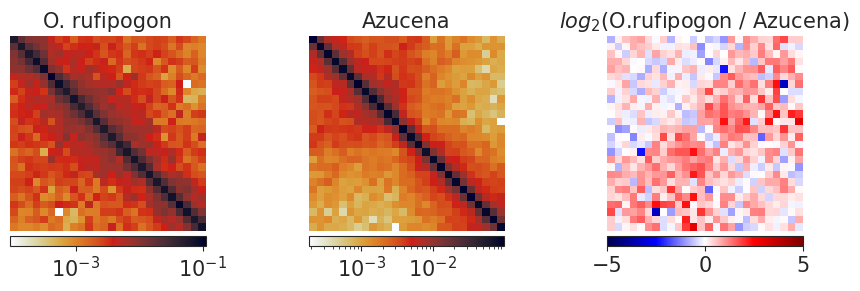

In [58]:
region_id = 220

window_start, window_end = regions.loc[region_id][1:3]
chromosome = regions.loc[region_id][0]

region_string = "{}:{}-{}".format(chromosome, window_start, window_end)
print(region_string)

patient_region_sub = patient_hic[region_string, region_string].data
control_region_sub = control_hic[region_string, region_string].data

min_v = min(
    [
        np.min(np.extract(patient_region_sub>0 , patient_region_sub)),
        np.min(np.extract(control_region_sub>0 , control_region_sub))
    ]
)

patient_region_sub += min_v
control_region_sub += min_v

l2fcm = np.log2(patient_region_sub / control_region_sub)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].set_title('O. rufipogon')
axes[1].set_title('Azucena')
axes[2].set_title('$log_2$(O.rufipogon / Azucena)')

m1 = axes[0].imshow(patient_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m2 = axes[1].imshow(control_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m3 = axes[2].imshow(l2fcm, cmap='seismic', vmax=5, vmin=-5)
for m, ax in zip([m1, m2, m3], axes):
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(m, cax=cax, orientation='horizontal')

plt.tight_layout()
#plt.savefig("../../docs/plots/chr2_example_region.png", dpi=250)

chr02:8256382-8324938


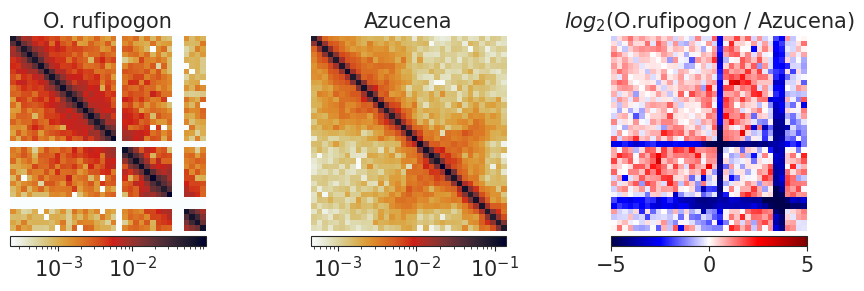

In [62]:
region_id = 184

window_start, window_end = regions.loc[region_id][1:3]
chromosome = regions.loc[region_id][0]

region_string = "{}:{}-{}".format(chromosome, window_start, window_end)
print(region_string)

patient_region_sub = patient_hic[region_string, region_string].data
control_region_sub = control_hic[region_string, region_string].data

min_v = min(
    [
        np.min(np.extract(patient_region_sub>0 , patient_region_sub)),
        np.min(np.extract(control_region_sub>0 , control_region_sub))
    ]
)

patient_region_sub += min_v
control_region_sub += min_v

l2fcm = np.log2(patient_region_sub / control_region_sub)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].set_title('O. rufipogon')
axes[1].set_title('Azucena')
axes[2].set_title('$log_2$(O.rufipogon / Azucena)')

m1 = axes[0].imshow(patient_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m2 = axes[1].imshow(control_region_sub, norm=matplotlib.colors.LogNorm(), cmap='germany')
m3 = axes[2].imshow(l2fcm, cmap='seismic', vmax=5, vmin=-5)
for m, ax in zip([m1, m2, m3], axes):
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(m, cax=cax, orientation='horizontal')

plt.tight_layout()
#plt.savefig("../../docs/plots/chr2_example_region.png", dpi=250)